In [31]:
import kagglehub
#The variable 'path' will store the location of the downloaded dataset
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\samar\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("covid_19_india.csv")
print("Dataset Loaded Successfully!")
data.head()


Dataset Loaded Successfully!


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
# Check exact column names and data types
print("Columns in dataset:", data.columns)
print("Data types in dataset:", data.dtypes)

columns_to_drop = ['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational']
data.drop([col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

data.info()
data.head()


Columns in dataset: Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
Data types in dataset: Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column   

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [34]:
# Print all column names to check for typos or extra spaces
print("Columns in dataset:", data.columns.tolist())

# Drop unnecessary columns if they exist
columns_to_drop = ['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational']
data.drop([col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

data.info()
display(data.head())

possible_confirmed = [col for col in data.columns if 'confirm' in col.lower()]
possible_deaths = [col for col in data.columns if 'death' in col.lower()]
possible_cured = [col for col in data.columns if 'cured' in col.lower() or 'recover' in col.lower()]

# Check if all necessary columns are present
if possible_confirmed and possible_deaths and possible_cured:
    confirmed_col = possible_confirmed[0]
    deaths_col = possible_deaths[0]
    cured_col = possible_cured[0]
    total_confirmed = data[confirmed_col].max()
    total_deaths = data[deaths_col].max()
    total_cured = data[cured_col].max()
    # Print the total summary
    print("Total Confirmed Cases:", int(total_confirmed))
    print("Total Deaths:", int(total_deaths))
    print("Total Recovered:", int(total_cured))
else:
    print("Some summary columns are missing! Please check the column names above.")

Columns in dataset: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 no

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


Total Confirmed Cases: 4290259
Total Deaths: 148011
Total Recovered: 1846641


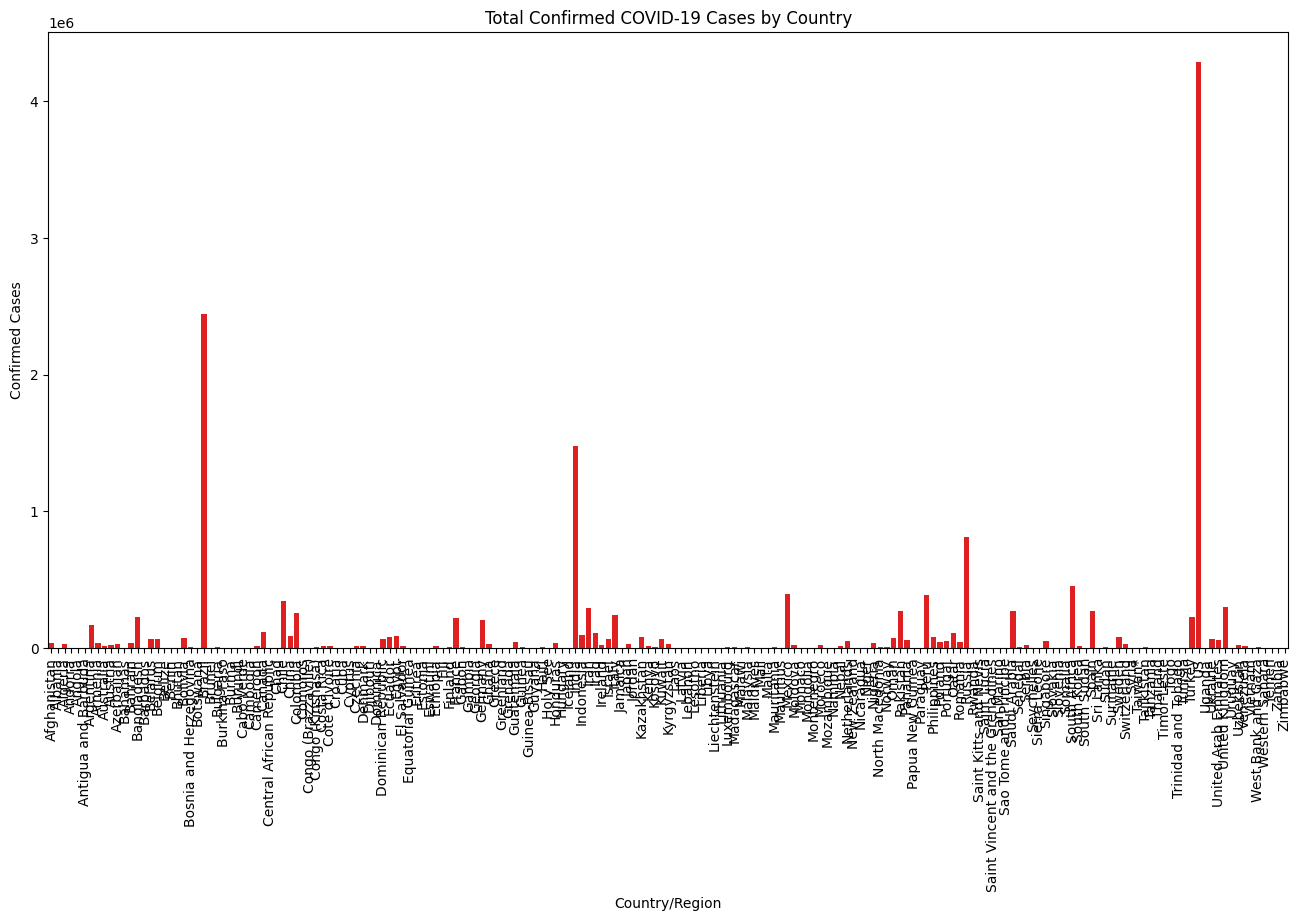

In [30]:
# Bar plot for total confirmed cases by country
plt.figure(figsize=(16,8))
sns.barplot(data=data, x='Country/Region', y='Confirmed', color='red')
plt.title("Total Confirmed COVID-19 Cases by Country")
plt.xlabel("Country/Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=90)
plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_20784\2352096015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


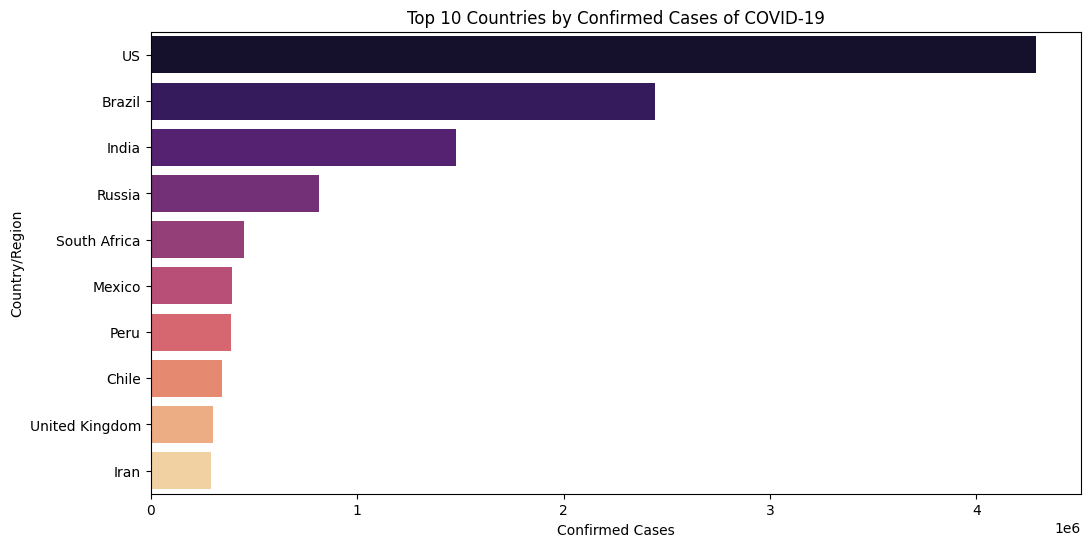

In [27]:
# Bar plot for top 10 countries by confirmed cases
top_countries = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

# Plotting the plots
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Confirmed Cases of COVID-19")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country/Region")
plt.show()

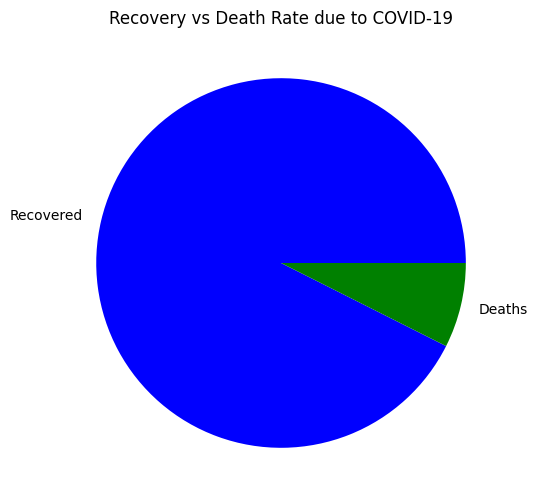

In [26]:
# Pie chart for Recovery vs Death Rate
labels = ['Recovered', 'Deaths']
sizes = [total_cured, total_deaths]

# Plotting the pie chart between Recovery and Deaths
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=["blue", "green"])  # blue and green shades
plt.title("Recovery vs Death Rate due to COVID-19")
plt.show()

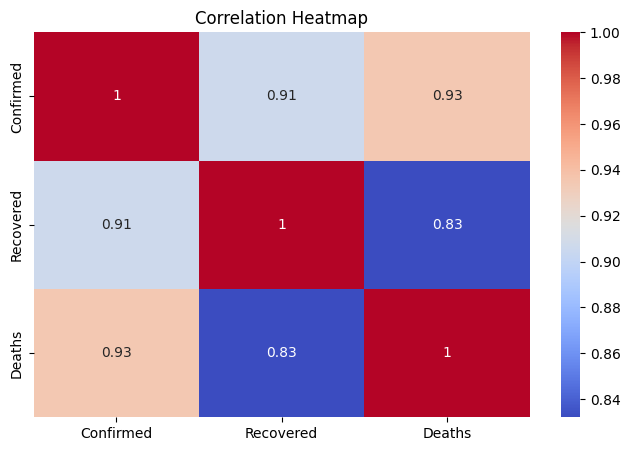

In [25]:
# Create a copy of the latest data
latest_data = data.copy()

# Plotting the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(latest_data[['Confirmed', 'Recovered', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

if all(col in data.columns for col in ['Confirmed', 'Deaths', 'Recovered']):
    # If you have a 'Date' column, you can plot the trend over time
    if 'Date' in data.columns:
        daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()

        plt.figure(figsize=(12,6))
        sns.lineplot(data=daily_cases, x='Date', y='Confirmed', color='green')
        plt.title("COVID-19 Trend Over Time")
        plt.xlabel("Date")
        plt.ylabel("Confirmed Cases")
        plt.show()